<a href="https://colab.research.google.com/github/MakC-Ukr/AP_Project_Group134/blob/master/Logistic-regression-and-EDA-Dry-Bean-Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA and Classification with Logistic Regression on the [Dry Bean Dataset](https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset)

### PCA variance BT
### ROC-AOU BT

### Loading libraries and data

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings
from sklearn.exceptions import ConvergenceWarning, UndefinedMetricWarning
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression  
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/ML Sem 5/Assignment 1/DryBeanDataset/Dry_Bean_Dataset.xlsx")

In [ ]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


### EDA

In [ ]:
df.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [ ]:
print(len(df.columns))

17


**Insight**

The data has 17 columns and no NaN values. \
Number of datapoints: 13611

Attribute Information:

1.) Area (A): The area of a bean zone and the number of pixels within its boundaries.\
2.) Perimeter (P): Bean circumference is defined as the length of its border. \
3.) Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean. \
4.) Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis. \
5.) Aspect ratio (K): Defines the relationship between L and l. \
6.) Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region. \
7.) Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed. \
8.) Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area. \
9.) Extent (Ex): The ratio of the pixels in the bounding box to the bean area.\ 
10.)Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans. \
11.)Roundness (R): Calculated with the following formula: (4piA)/(P^2) \
12.)Compactness (CO): Measures the roundness of an object: Ed/L \
13.)ShapeFactor1 (SF1) \
14.)ShapeFactor2 (SF2) \
15.)ShapeFactor3 (SF3) \
16.)ShapeFactor4 (SF4) \
17.)Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira) \




In [ ]:
for col in df.columns:
  print(col, df[col].nunique())

Area 12011
Perimeter 13416
MajorAxisLength 13543
MinorAxisLength 13543
AspectRation 13543
Eccentricity 13543
ConvexArea 12066
EquivDiameter 12011
Extent 13535
Solidity 13526
roundness 13543
Compactness 13543
ShapeFactor1 13543
ShapeFactor2 13543
ShapeFactor3 13543
ShapeFactor4 13543
Class 7


In [ ]:
for col in df.columns:
  print(col, df.isnull()[col].sum())

Area 0
Perimeter 0
MajorAxisLength 0
MinorAxisLength 0
AspectRation 0
Eccentricity 0
ConvexArea 0
EquivDiameter 0
Extent 0
Solidity 0
roundness 0
Compactness 0
ShapeFactor1 0
ShapeFactor2 0
ShapeFactor3 0
ShapeFactor4 0
Class 0


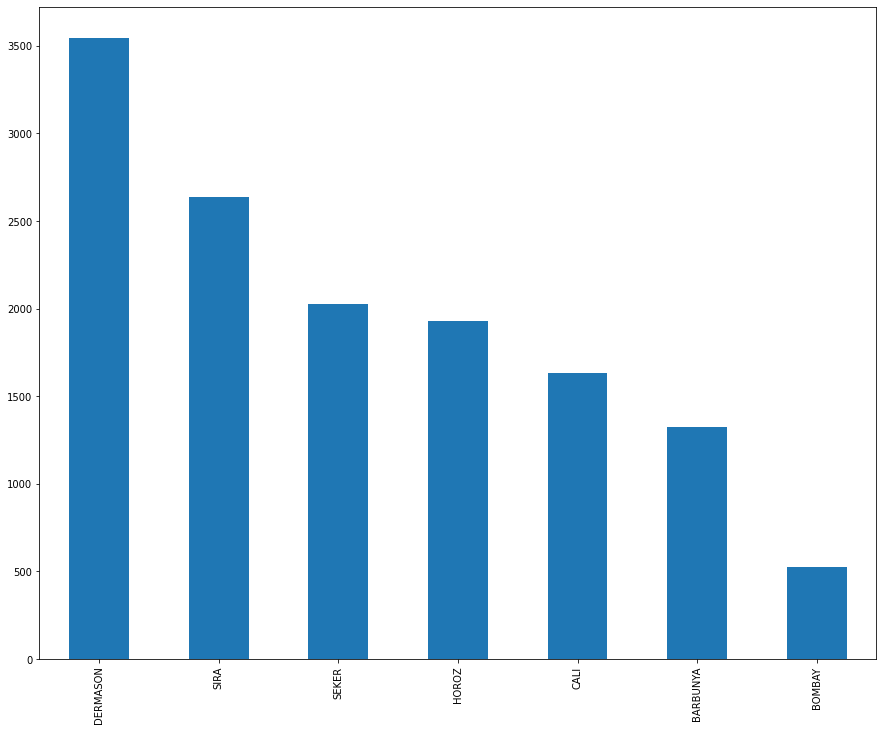

In [ ]:
plt.figure(figsize=(15,12))
df['Class'].value_counts().plot(kind='bar')

**Insight**

The class labels are not uniformly distributed

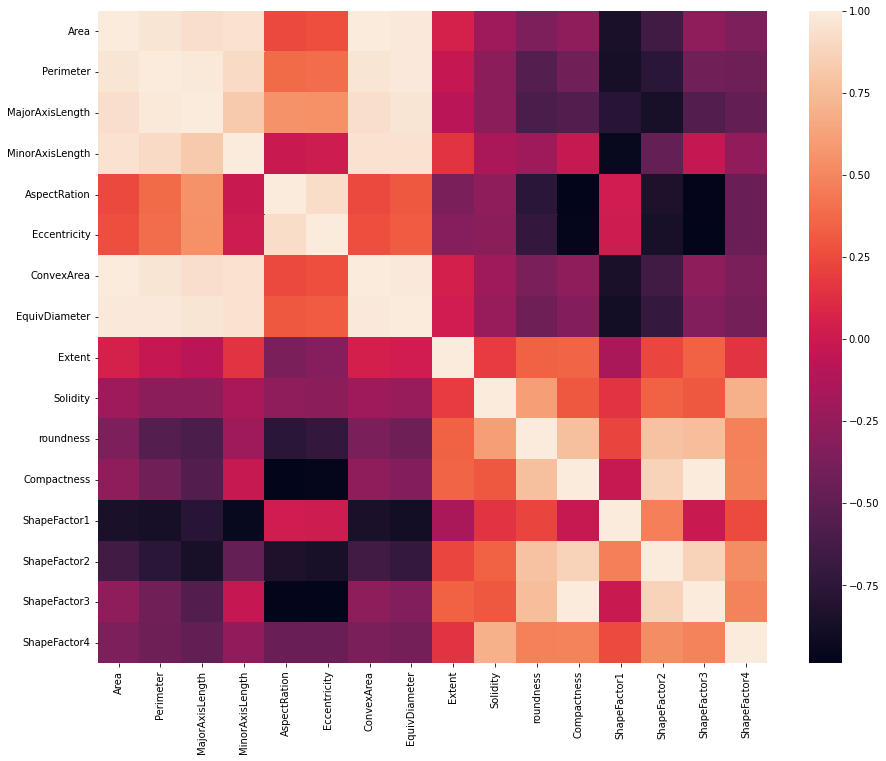

In [ ]:
plt.figure(figsize=(15,12))
corr = df.corr()
sns.heatmap(corr)
plt.show()

**Insight**

Some columns have high correlation:

*   Perimeter - area - majoraxislength etc.
*   AspectRation - Compactness
*   ShapeFactor2 - Eccentricity - ShapeFactor3



Text(0.5, 1.0, 'Area distribution')

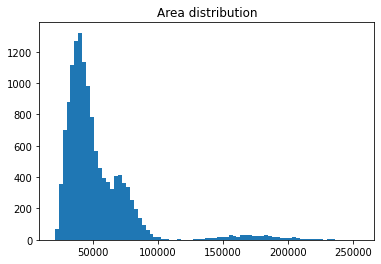

In [ ]:
plt.hist(df['Area'], bins=77)
plt.title('Area distribution')

Text(0.5, 1.0, 'Extent distribution')

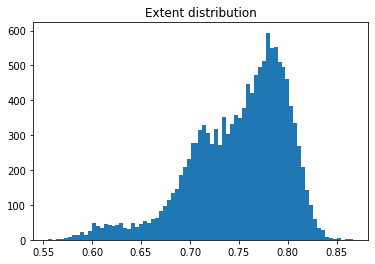

In [ ]:
plt.hist(df['Extent'], bins=77)
plt.title('Extent distribution')

Text(0.5, 1.0, 'ShapeFactor1 distribution')

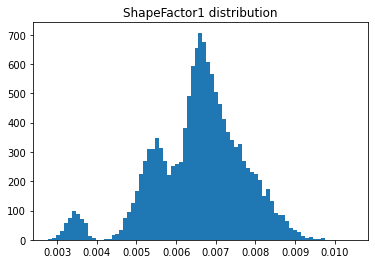

In [ ]:
plt.hist(df['ShapeFactor1'], bins=77)
plt.title('ShapeFactor1 distribution')

Text(0.5, 1.0, 'ShapeFactor3 distribution')

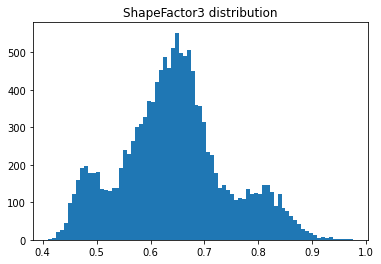

In [ ]:
plt.hist(df['ShapeFactor3'], bins=77)
plt.title('ShapeFactor3 distribution')

In [ ]:
len(df)

13611

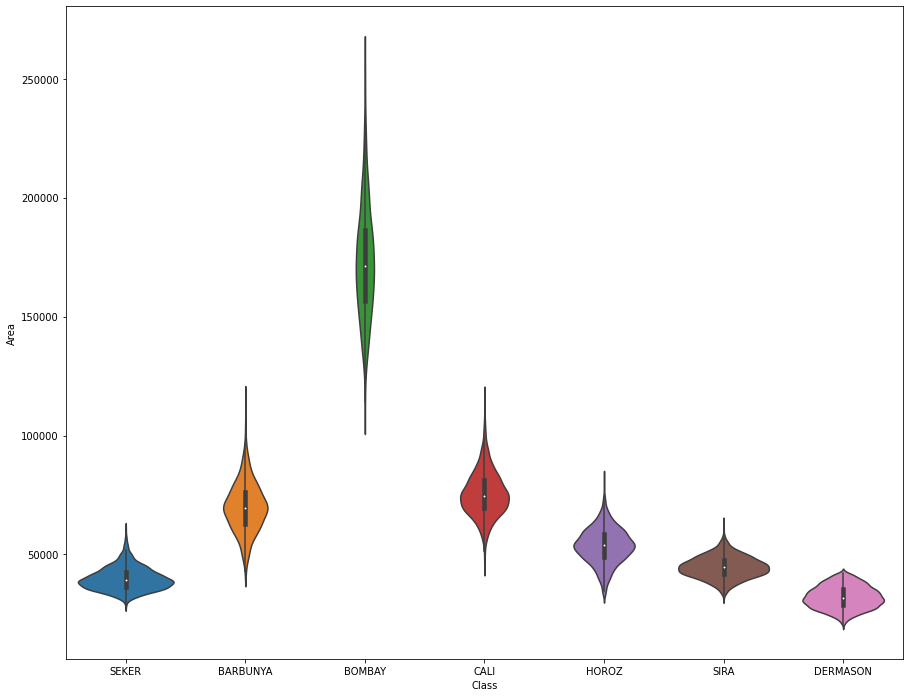

In [ ]:
plt.figure(figsize=(15,12))
sns.violinplot(x=df['Class'], y=df['Area'])
plt.show()

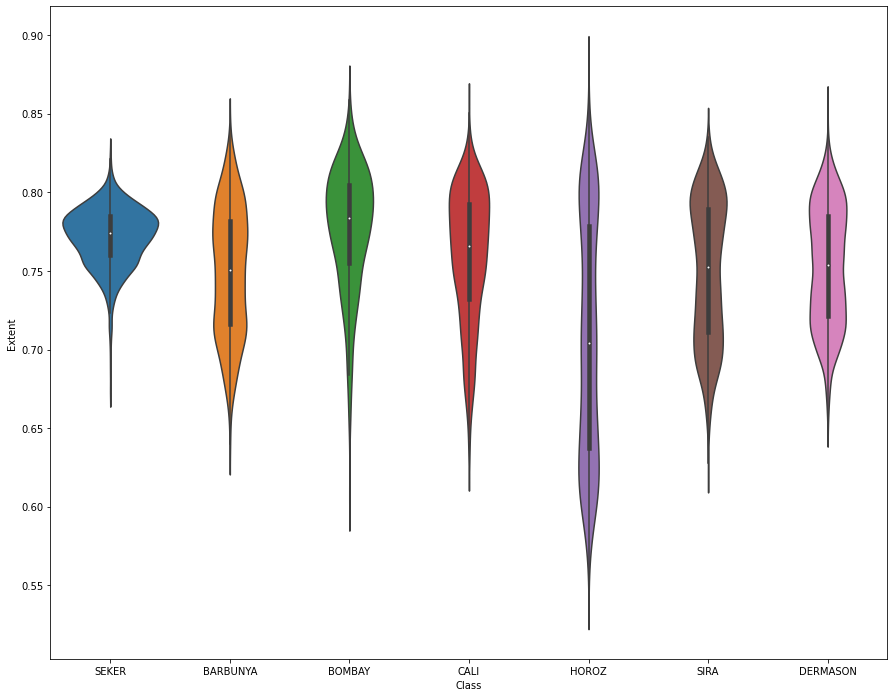

In [ ]:
plt.figure(figsize=(15,12))
sns.violinplot(x=df['Class'], y=df['Extent'])
plt.show()

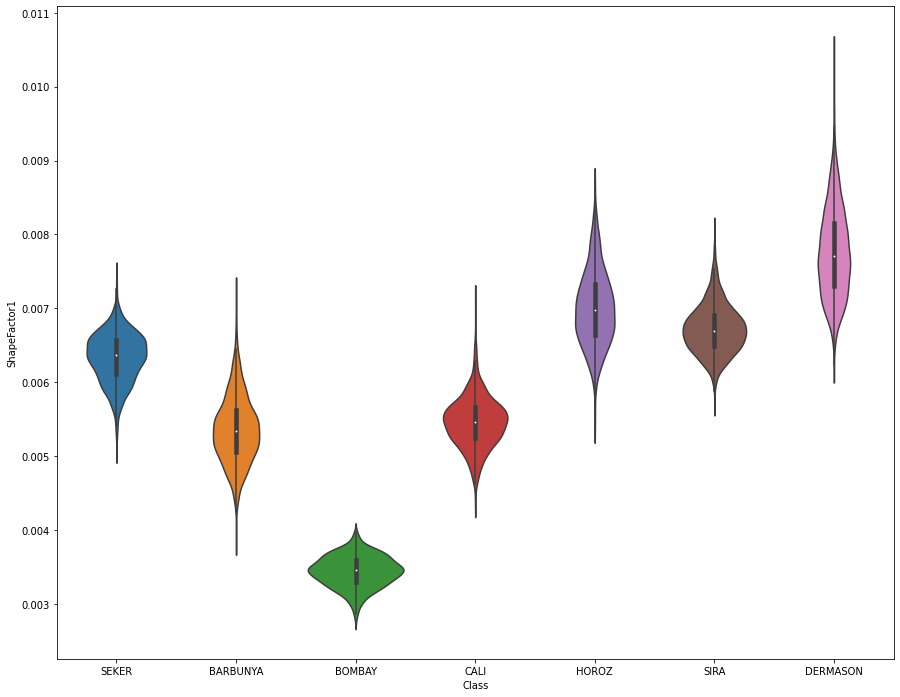

In [ ]:
plt.figure(figsize=(15,12))
sns.violinplot(x=df['Class'], y=df['ShapeFactor1'])
plt.show()

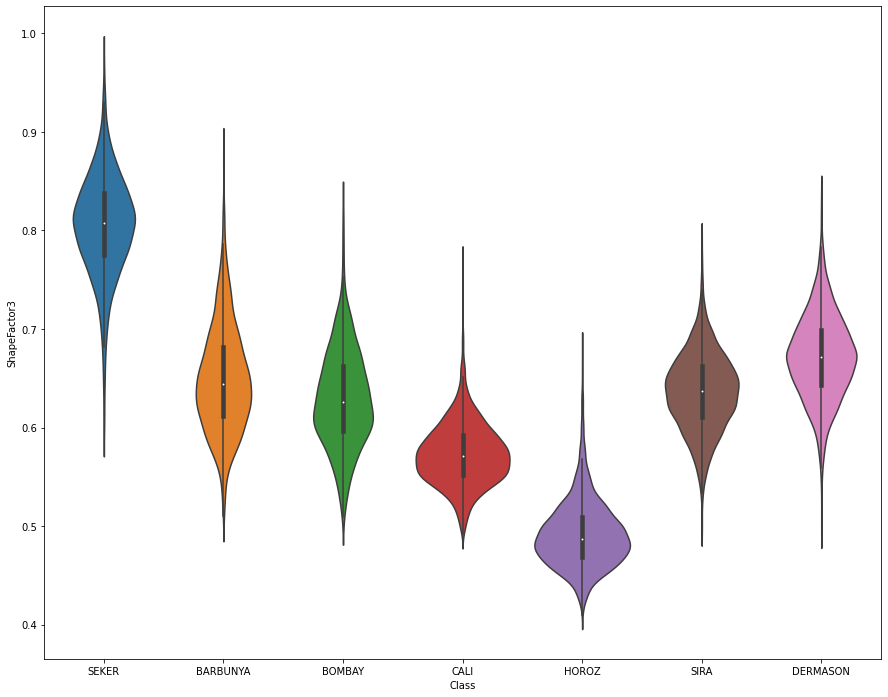

In [ ]:
plt.figure(figsize=(15,12))
sns.violinplot(x=df['Class'], y=df['ShapeFactor3'])
plt.show()

**Insight**

Some classes have distributions that are very different from all other categories for specific columns.\
For e.g. : \
Class *Bombay* in the column *ShapeFactor1* \
Class *Bombay* in the column *Area* \
Class *Horoz* in the column *ShapeFactor3* \

In [ ]:
# plt.figure(figsize=(30,16))
# sns.pairplot(df, hue = 'Class', palette='gist_rainbow')
# plt.show()

**Insight**

Since there a large number of columns, there are some example columns which are not adding much information to our knowledge of the dataset. This can be observed due to very similar class distribution for column pairs 

### t-SNE

In [ ]:
transformed_data = pd.DataFrame(TSNE().fit_transform(df.loc[:, df.columns != "Class"]), columns = ['dim1', 'dim2'])
transformed_data['Class']= df['Class']

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
transformed_data.shape

(13611, 3)

In [ ]:
transformed_data.head()

,dim1,dim2,Class
0,-7.040034,-65.714409,SEKER
1,-3.860272,-77.631989,SEKER
2,-22.361237,-73.838844,SEKER
3,-57.954472,-26.992268,SEKER
4,-57.684746,-31.247437,SEKER


In [ ]:
# transformed_data['dim1'] = transformed_data['dim1'].astype(int)
# transformed_data['dim2'] = transformed_data['dim2'].astype(int)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


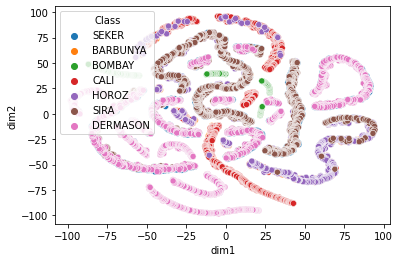

In [ ]:
sns.scatterplot('dim1', 'dim2', data=transformed_data, hue='Class')

The data is easily separable on first look, however, for linear functions it will is highy improbable to be resolved in 2 dimensions

### Naive Bayes

In [ ]:
X, y = df.loc[:, df.columns != "Class"], df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 2723 points : 646


In [ ]:
print("Precision score: ", precision_score(y_test, y_pred, average = 'macro'))
print("Recall score: ", recall_score(y_test, y_pred, average = 'macro'))
print("F1 score: ", f1_score(y_test, y_pred, average = 'macro'))

Precision score:  0.7628587378245324
Recall score:  0.7589419260806964
F1 score:  0.7593069911571686


In [ ]:
X, y = df.loc[:, df.columns != "Class"], df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
gnb = MultinomialNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 2723 points : 582


In [ ]:
print("Precision score: ", precision_score(y_test, y_pred, average = 'macro'))
print("Recall score: ", recall_score(y_test, y_pred, average = 'macro'))
print("F1 score: ", f1_score(y_test, y_pred, average = 'macro'))

Precision score:  0.7926559151674061
Recall score:  0.7877400682040411
F1 score:  0.7896989027618477


As we can see, the F1 score for the MultinomialNB is higher than a simple Gaussian Naive Bayes classification. This makes sense because MultinomialNB `implements the naive Bayes algorithm for multinomially distributed data`

### PCA

In [ ]:
X, y = df.loc[:, df.columns != "Class"], df['Class']

In [ ]:
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)

In [ ]:
def compare_results_for_n_components(n_components, X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
  pca = PCA(n_components = n_components)
  pca.fit(X_train)
  X_train = pca.transform(X_train)
  var_total = pca.explained_variance_ratio_.cumsum()
  X_test = pca.transform(X_test)
  model = LogisticRegression(max_iter = 400)
  model.fit(X_train, y_train) 
  predictions = model.predict(X_test)
  print(X_test.shape)
  print("n_components = ", n_components)
  print("accuracy: ", accuracy_score(y_test, predictions))
  print("precision: ", precision_score(y_test, predictions, average = 'macro'))
  print("recall: ", recall_score(y_test, predictions, average = 'macro'))
  print("f1 score: ", f1_score(y_test, predictions, average = 'macro'))
  print("-------------------------------------------------------------")
  print()
  return f1_score(y_test, predictions, average = 'macro')

In [ ]:
results = []
for i in range(1,15):
  results.append(compare_results_for_n_components(i, X,y))

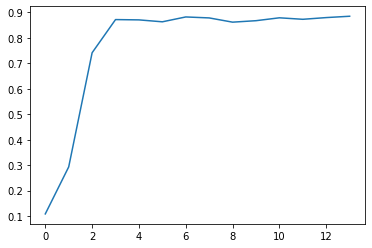

In [ ]:
plt.plot(results)

As expected, with higher variance preserved, the f1 score increases until a certain point (n = 5), after which the model start overfitting

### ROC-AOU

Since the results seemed to be the most accurate with PCA extracting 5 components, we will run a LogRegr model on it only

In [ ]:
X, y = df.loc[:, df.columns != "Class"], df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
pca = PCA(n_components = 5)
pca.fit(X_train)
X_train = pca.transform(X_train)
var_total = pca.explained_variance_ratio_.cumsum()
X_test = pca.transform(X_test)
model = LogisticRegression(max_iter = 400)
model.fit(X_train, y_train) 
predictions = model.predict(X_test)

In [ ]:
# y_pred_proba = model.predict_proba(X_test)[::,1]
# fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
# plt.plot(fpr,tpr)
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

### LogisticRegression

In [ ]:
X, y = df.loc[:, df.columns != "Class"], df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LogisticRegression(max_iter = 400)
model.fit(X_train, y_train) 
predictions = model.predict(X_test)

In [ ]:
print("Precision score: ", precision_score(y_test, predictions, average = 'macro'))
print("Recall score: ", recall_score(y_test, predictions, average = 'macro'))
print("F1 score: ", f1_score(y_test, predictions, average = 'macro'))

Precision score:  0.7837846341675236
Recall score:  0.7731957295426939
F1 score:  0.7778633771968657


When training a logistic regression model on the whole dataset, we see that the model gives a lower classification accuracy than when using PCA. This is probably due to the fact that many columns are highly correlated in the dataset (as seen in EDA part of the notebook). It leads to the conclusion, that for this dataset, reducing the dimensions with statistical methods like PCA not only makes the classification model more cost-efficient but also prevents it from overfitting. 